In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

- Analysing Data

In [18]:
Data = pd.read_csv('c:/Users/lorth/OneDrive/Desktop/Notebook/Datas/jobs_in_data.csv')
df = pd.DataFrame(Data)
df


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [5]:
print(df.duplicated().sum())
df.drop_duplicates().reset_index(drop = True).head()

4014


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [6]:
df['work_year'].nunique(), df['work_year'].unique(), df['work_year'].value_counts()

(4,
 array([2023, 2022, 2020, 2021], dtype=int64),
 work_year
 2023    7453
 2022    1634
 2021     197
 2020      71
 Name: count, dtype: int64)

In [7]:
# Calculate the Percentage of Job Titles in the Dataset
df['job_title'].value_counts(normalize = True) * 100 , df['job_title'].nunique()

(job_title
 Data Engineer                     23.463389
 Data Scientist                    21.261358
 Data Analyst                      14.836986
 Machine Learning Engineer         10.593266
 Applied Scientist                  2.907536
                                     ...    
 Consultant Data Engineer           0.010689
 Sales Data Analyst                 0.010689
 Managing Director Data Science     0.010689
 AWS Data Architect                 0.010689
 Deep Learning Researcher           0.010689
 Name: proportion, Length: 125, dtype: float64,
 125)

In [8]:
df['job_category'].nunique(), df['job_category'].value_counts(normalize= True)*100

(10,
 job_category
 Data Science and Research         32.218065
 Data Engineering                  24.158204
 Data Analysis                     15.574559
 Machine Learning and AI           15.264564
 Leadership and Management          5.376804
 BI and Visualization               3.345804
 Data Architecture and Modeling     2.768573
 Data Management and Strategy       0.652058
 Data Quality and Operations        0.587921
 Cloud and Database                 0.053447
 Name: proportion, dtype: float64)

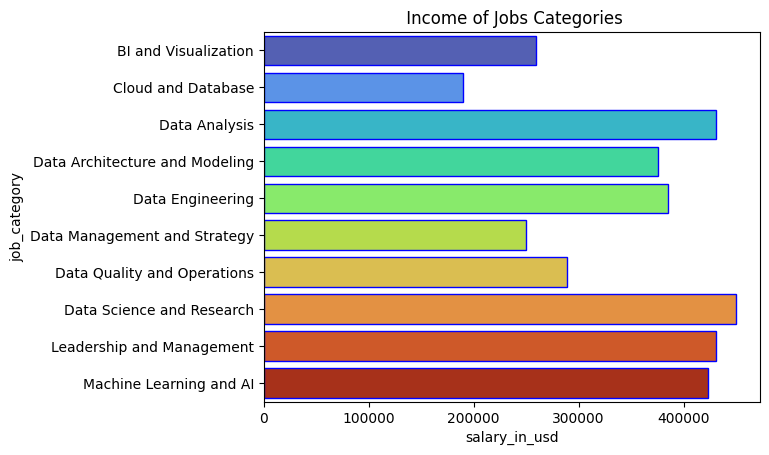

In [9]:
val=df.groupby("job_category")["salary_in_usd"].max().reset_index()
sns.barplot(data=val , y=val["job_category"] , x=val["salary_in_usd"], palette="turbo" ,edgecolor="blue").set(title =' Income of Jobs Categories' )
plt.show()

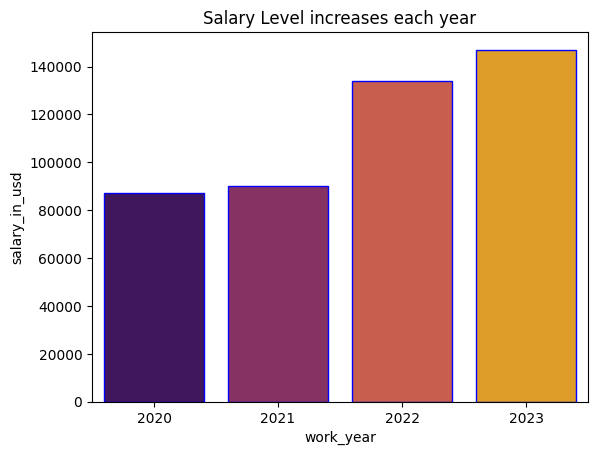

In [10]:
val=df.groupby("work_year")[["salary_in_usd"]].median().reset_index()
fig = sns.barplot(data = val, x = 'work_year', y = 'salary_in_usd', palette= 'inferno', edgecolor= 'blue').set(title = 'Salary Level increases each year')
plt.show()

<Axes: title={'center': 'Ratio of Employee Residence'}, ylabel='count'>

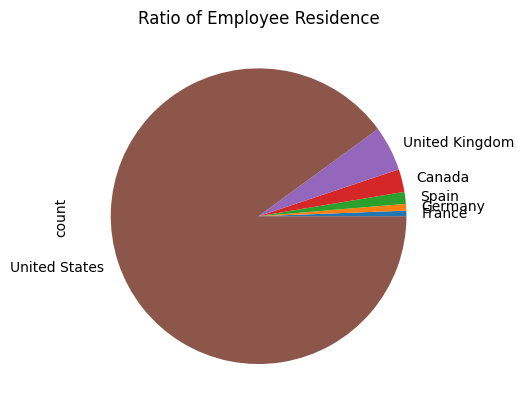

In [11]:
df.groupby('employee_residence')['employee_residence'].value_counts().sort_values().tail(6).plot(kind = 'pie', title = 'Ratio of Employee Residence')

<Axes: title={'center': 'Employment Type for all Workers'}, xlabel='employment_type'>

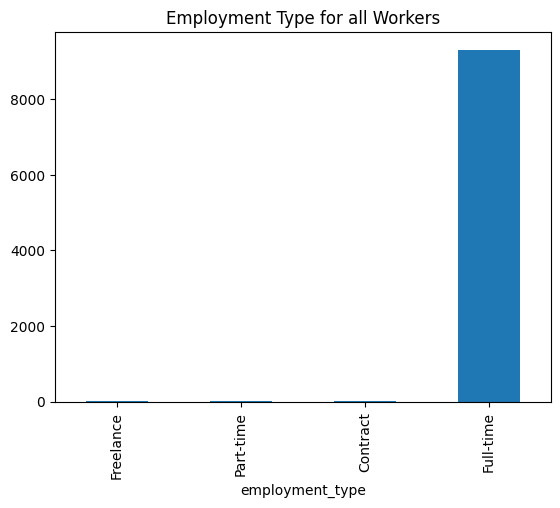

In [12]:
df.groupby('employment_type')['employment_type'].value_counts().sort_values().tail().plot(kind = 'bar', title = 'Employment Type for all Workers')

In [13]:
val = df.groupby('employment_type')['experience_level'].value_counts().reset_index()
plot = px.bar(val,
               x = 'employment_type',
               y = 'count', 
               color = 'experience_level', 
               barmode='group')
plot.update_layout(title = 'Employment Type with Experience Level' )
plot.show()

In [14]:
val = df.groupby('work_setting')['job_category'].value_counts().reset_index()
plot = px.bar(val, x = 'work_setting', y = 'count', color = 'job_category', barmode = 'group')
plot.update_layout(title = 'Work Setting for the Various Job Categories')
plot.show()

In [15]:
print(df['employee_residence'].equals(df['company_location']))
print('Not all Employees live in the same Country as the comapany they work for')

False
Not all Employees live in the same Country as the comapany they work for


In [16]:
df.groupby([df['employee_residence'], df['company_location']]).size().reset_index(name = 'count')

,employee_residence,company_location,count
0,Algeria,Algeria,1
1,American Samoa,Bahamas,1
2,Andorra,Andorra,1
3,Argentina,Argentina,5
4,Argentina,Mexico,1
...,...,...,...
150,United States,United States,8080
151,Uzbekistan,Russia,1
152,Uzbekistan,United States,2
153,Vietnam,United Kingdom,1
